### **DOG VS CAT PREDICTION SYSTEM USING CNN**

In [1]:
import numpy as np
import pandas as pd
import zipfile
import keras as kt
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Dropout
from keras import Sequential
from tensorflow import keras
import tensorflow as tf



In [ ]:
zip_data = zipfile.ZipFile(r"C:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\datasets\archive.zip", 'r')
zip_data.extractall('datasets')
zip_data.close()

In [2]:
train_data = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\notebooks\CNN\datasets\train',
    labels = 'inferred',
    label_mode = 'int', 
    batch_size = 30,
    image_size = (256, 256)
    
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\notebooks\CNN\datasets\test',
    labels = 'inferred',
    label_mode = 'int', 
    batch_size = 30,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# NORMALIZE

def normalize(image, label):
    image = tf.cast(image/255. , tf.float32 )
    return image, label

train_data = train_data.map(normalize)
validation_data = validation_data.map(normalize)

In [4]:
model = Sequential()

model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(train_data, epochs=10, validation_data = validation_data)

### **DATA AUGMENTATION**

In [7]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
img = image.load_img(r"C:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\notebooks\CNN\datasets\train2\dog.185.jpg", target_size=(200,200))
import matplotlib.pyplot as plt

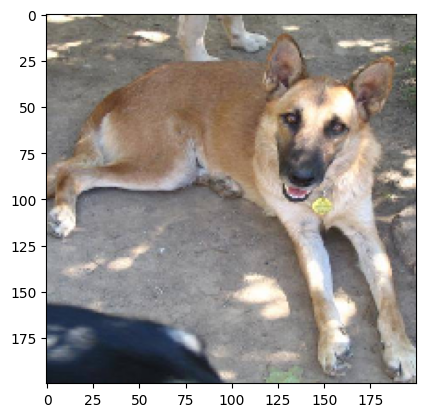

In [9]:
plt.imshow(img)

In [10]:
img = image.img_to_array(img)

In [11]:
img.shape

(200, 200, 3)

In [12]:
datagen = ImageDataGenerator(

    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 40,
    
)

In [13]:
input_batch = img.reshape(1, 200, 200, 3)

In [14]:
i = 0

for output in datagen.flow(input_batch, batch_size= 1, save_to_dir="./datasets/data_aug", save_prefix='aug', save_format='jpg'):
    i+=1
    
    if i == 10:
        break


In [19]:
## for entire folder

batch_size = 12

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
)

test_datagen = ImageDataGenerator( rescale= 1./255 )
                                

In [22]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\notebooks\CNN\datasets\train",
    target_size = (200, 200),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\notebooks\CNN\datasets\test"  ,
    target_size = (200, 200),
    batch_size = batch_size,
    class_mode = 'binary'  
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
